<div style="text-align: center">
<h1>INFO 6105 Data Sci Engineering Methods and Tools</h1>
</div>
<div style="text-align: center">
<h2>FINAL PROJECT</h2>
</div>
<div style="text-align: center">
<h3>Scraping Updated Coronavirus Data from WORLDOMETER</h3>
    <h3>Sentiment Analysis</h3>
</div>
<div style="text-align: center">
<a href= "https://www.worldometers.info/coronavirus/">
</a>
</div>


In [7]:
from bs4 import BeautifulSoup
import  requests
import numpy as np
import pandas as pd

In [4]:
url = 'https://www.worldometers.info/coronavirus/'

In [5]:
source = requests.get(url)
soup = BeautifulSoup(source.text, 'html.parser')
title = soup.find('title')

In [6]:
print(title)

<title>Coronavirus Update (Live): 1,266,614 Cases and 69,169 Deaths from COVID-19 Virus Outbreak - Worldometer</title>


In [28]:
div = soup.find_all(id = 'maincounter-wrap')
print(div[0].find('h1').get_text() , div[0].find('span').get_text())
print(div[1].find('h1').get_text() , div[1].find('span').get_text())
print(div[2].find('h1').get_text() , div[2].find('span').get_text())

Coronavirus Cases: 1,266,614 
Deaths: 69,169
Recovered: 260,967


In [162]:
table = soup.find_all(id = 'main_table_countries_today')
columns = table[0].find('tr').get_text()
columns = columns.replace('/', '')
columns = columns.replace(',', '')
columns = columns.replace('', '')
res1 = (columns.rstrip().split('\n')) 
res1.pop(13)
res1.pop(0)
# Printing result 
print(str(res1))

['CountryOther', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'ActiveCases', 'SeriousCritical', 'Tot\xa0Cases1M pop', 'Deaths1M pop', 'TotalTests', 'Tests']


In [188]:
table1 = soup.find_all(id = 'main_table_countries_today')
a = table[0].find('tbody')
b = a.find_all('tr')
c = b[1].get_text()
res2 = (c.rstrip().split('\n'))  
res2.pop(0)
# Printing result 
print(str(res2)) 
row = [res2]



['USA', '333,017', '+21,660', '9,528 ', '+1,076', '17,018', '306,471', '8,623', '1,006', '29', '1,751,296', '5,291']
<class 'list'>


In [177]:
# df = pd.DataFrame(res2, columns = ['','Country,Other','TotalCases','NewCases','TotalDeaths','NewDeaths','TotalRecovered','ActiveCases','Serious','Critical','Tot\xa0Cases/1M pop','Deaths/1M pop','TotalTests','Tests','1M pop'])
df = pd.DataFrame(row, columns = ['CountryOther', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'ActiveCases', 'SeriousCritical', 'TotalCases1Mpop', 'Deaths1Mpop', 'TotalTests', 'Tests'])
df

,CountryOther,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,SeriousCritical,TotalCases1Mpop,Deaths1Mpop,TotalTests,Tests
0,USA,"333,017","+21,660","9,528","+1,076","17,018","306,471","8,623","1,006",29,"1,751,296","5,291"


In [192]:
table1 = soup.find_all(id = 'main_table_countries_today')
a = table[0].find('tbody')
b = a.find_all('tr')
row=[]
for i in range(0,len(b)):
    c= b[i].get_text()
    res2 = (c.rstrip().split('\n'))  
    res2.pop(0)
    row.append(res2)
print(row)
    
    

[['World', '1,266,614', '+65,161', '69,169', '+4,481', '260,967', '936,478', '45,530', '162', '8.9'], ['USA', '333,017', '+21,660', '9,528 ', '+1,076', '17,018', '306,471', '8,623', '1,006', '29', '1,751,296', '5,291'], ['Spain', '130,854', '+4,686', '12,518 ', '+571', '38,080', '80,256', '6,861', '2,799', '268', '355,000', '7,593'], ['Italy', '128,948', '+4,316', '15,887 ', '+525', '21,815', '91,246', '3,977', '2,133', '263', '691,461', '11,436'], ['Germany', '100,024', '+3,932', '1,576 ', '+132', '28,700', '69,748', '3,936', '1,194', '19', '918,460', '10,962'], ['France', '92,839', '+2,886', '8,078 ', '+518', '16,183', '68,578', '6,838', '1,422', '124', '224,254', '3,436'], ['Iran', '58,226', '+2,483', '3,603 ', '+151', '19,736', '34,887', '4,103', '693', '43', '186,000', '2,214'], ['UK', '47,806', '+5,903', '4,934 ', '+621', '135', '42,737', '1,559', '704', '73', '195,524', '2,880'], ['Turkey', '27,069', '+3,135', '574 ', '+73', '1,042', '25,453', '1,381', '321', '7', '181,445', '2,

In [193]:
df = pd.DataFrame(row, columns = ['CountryOther', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'ActiveCases', 'SeriousCritical', 'TotalCases1Mpop', 'Deaths1Mpop', 'TotalTests', 'Tests'])
df

,CountryOther,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,SeriousCritical,TotalCases1Mpop,Deaths1Mpop,TotalTests,Tests
0,World,"1,266,614","+65,161","69,169","+4,481","260,967","936,478","45,530",162,8.9,None,None
1,USA,"333,017","+21,660","9,528","+1,076","17,018","306,471","8,623","1,006",29,"1,751,296","5,291"
2,Spain,"130,854","+4,686","12,518",+571,"38,080","80,256","6,861","2,799",268,"355,000","7,593"
3,Italy,"128,948","+4,316","15,887",+525,"21,815","91,246","3,977","2,133",263,"691,461","11,436"
4,Germany,"100,024","+3,932","1,576",+132,"28,700","69,748","3,936","1,194",19,"918,460","10,962"
...,...,...,...,...,...,...,...,...,...,...,...,...
206,Papua New Guinea,1,,,,,1,,0.1,,72,8
207,Saint Pierre Miquelon,1,+1,,,,1,,173,None,None,None
208,South Sudan,1,+1,,,,1,,0.09,None,None,None
209,Timor-Leste,1,,,,,1,,0.8,None,None,None


In [1]:

import tweepy
from textblob import TextBlob
import matplotlib.pyplot as plt

RT @MBuhari: I wholeheartedly thank all Nigerians for your patience, resolve and strong determination to defeat the Covid-19 outbreak.
RT @TheLocalFrance: France records 643 new Covid-19 fatalities as number of patients in intensive care falls again https://t.co/VVNttvmvVy
RT @WillBlackWriter: 28 NHS workers killed saving people struck by Covid-19

These are the true heroes of our age. Boris Johnson is not a h…
RT @MMAjunkie: .@DustinPoirier, @TheGoodFightFDN donate 1,000 meals to hospital staff amid COVID-19 crisis (via @MikeBohnMMA) https://t.co/…
RT @DGPurser: Church isn't a building, it's a body of believers.

Because of precautions for COVID-19, the congregation of Harriett Baptist…
RT @NabiyaKhan11: Thank God, @rahulkanwal did not go to Dharavi. Otherwise he would have 'exposed' the 'poor' for not practicing enough soc…
RT @Tutsy22: Kano records first case of COVID-19.

#CovidNGR
‘Minor League Baseball hopes to delay talks with MLB amidst COVID-19 challenges’ by @EvanDrellich for

RT @Education4Libs: A tech nerd with no medical degree is pushing a vaccine / microchips for a virus he patented.

The head doc of the CDC…
RT @briefcasebrady: @NPR Why even run this article? 
It's irrelevant with no control group.
53 seriously ill COVID-19 patients ate Tide Pod…
RT @jamesdeens: @angiebeeb @dubste86 @askeamonn @orwell4ever @TrichDee @tnteacherTim @DisparatePost @Morfinn @Jimcorrsays @DianeDenizen @fi…
RT @itsmwangala: If I survive this hard moments of Covid- 19 I swear, will try this thing called dating  too 🤣🤣
RT @OmeTV_Chat: It's the weekend again and since the Covid-19 lockdown continues there is absolutely nothing more entertaining to do than t…
RT @angryblkhoemo: Another potentially huge issue of COVID-19 recovery is, even once a vaccine is developed, fully tested and put out......…
RT @Just_Screams: Hey @rahulkanwal I live in a student housing complex in Germany. When the Covid-19 lockdown came almost everyone decided…
RT @Education4Libs: A tech nerd with no medi

Trial drug can significantly block early stages of COVID-19 in engineered human tissues https://t.co/0crjv4x5ZL
RT @Lafayette_CO: Anyone can get COVID-19, but certain people are at higher risk of getting very sick, including:
▪️Older people 60+, espec…
RT @TheBabylonBee: COVID-19 is far from the deadliest event to face humanity. Here are 10 other catastrophes that were far deadlier: https:…
RT @ToucheAmore: Paypal $1 or more to toucheamorestore@gmail.com with your preferred e-mail in the notes section

50% Of all profits will g…
RT @TheAloaye: I believe the solution to the Covid-19 madness is a medicine sourced from the laps of ticks.
Why? Because tick thighs save l…
RT @charlesadler: #podcast #Covid_19 We humans sabotage our present &amp; future by how we interact with animals we abuse, slaughter, and eat.…
No, you're crying! 
***
Rock star Jon Bon Jovi's restaurant is still cooking, feeding homeless and in-need customer… https://t.co/2ISpSwKsGd
RT @MBuhari: I wholeheartedly thank all

RT @_miissrue: I woke up to news of a single mum who lost the battle to COVID-19. She left behind her 12 year old daughter, the daughter is…
RT @darrenrovell: As of now, every team sport has one common denominator when thinking about a return: 1. Need an antibody test, 2. Need a…
RT @SaketGokhale: We've all been seeing Health Ministry spokesperson Lav Agarwal's Covid-19 "updates", changing numbers on a whim, &amp; praisi…
Tableau Foundation COVID-19 Community Response Fund. 5 grants available to nonprofits in DC; more around the world.… https://t.co/FHCSkwLZjC
RT @TIME: “I want our story to be told from us directly.” A professional photographer-turned-paramedic documents a week fighting the COVID-…
RT @WGHealthandCare: To help us understand more about how and where #coronavirus (COVID-19) is affecting people we need people to answer qu…
RT @JaiveerShergill: Man who is exhibiting true statesmanship, focused on taming &amp; eradicating #COVID__19 with strategy &amp; impeccable admini…
RT

RT @thecableng: BREAKING: #Osun discharges 10 COVID-19 patients via @thecableng 

#COVID19
RT @TIME: “I want our story to be told from us directly.” A professional photographer-turned-paramedic documents a week fighting the COVID-…
RT @UN: Many children need extra support to cope with the changes brought on by #COVID19.

A new storybook produced in collaboration with 5…
RT @BruceDawson0xB: My daughter lives in Canada and applied for the COVID-19 benefit on Tuesday. It took two minutes to apply. The first pa…
RT @MamiSellyy: People in California don't call it COVID-19... We just say "with all this shit going on" 🤣🤣
RT @lydiadepillis: Catching up on all the crazy stuff my colleagues have been digging into this week. Like this dissection of the way the W…
RT @GrrrGraphics: Montana whistleblower  the CDC is manipulating the Covid-19 death toll
https://t.co/7xQRSFIRBq
RT @Education4Libs: A tech nerd with no medical degree is pushing a vaccine / microchips for a virus he patented.

The head 

RT @BillyCorben: Black doctor who tests homeless for COVID-19 was handcuffed by @MiamiPD cop outside his home "for no reason" #BecauseMiami…
RT @juliakite: OK, I see today’s hysteria is, “New York City is throwing dead COVID-19 patients in mass graves you can see from space,” so…
RT @ShemekaMichelle: Dear Surgeon General, 

I don’t have a Big Mama, but I can help you on who’s at fault for Blacks disproportionately su…
RT @CNNAfrica: In Guangzhou, Africans have been evicted from their homes by landlords and turned away from hotels, despite many claiming to…
RT @Frances_Coppola: On Good Friday, 980 people died of Covid-19 in the United Kingdom.  These are hospital deaths only, so the real figure…
RT @TeaPainUSA: COVID-19 FACTS: There is now 1 Trump COVID-19 death for every 2 of Hillary's emails.
RT @NPR: A study funded by Gilead Sciences evaluating the use of its drug remdesivir to treat 53 seriously ill COVID-19 patients found that…
RT @NatashaBertrand: “In the January 29 memo, Navarro 

RT @MotherJones: The New York Times has documents that show Trump’s COVID-19 response was even worse than anyone knew https://t.co/FAqyS0sh…
RT @lydiadepillis: Catching up on all the crazy stuff my colleagues have been digging into this week. Like this dissection of the way the W…
@HuXijin_GT 1/2 Many comments saying China is cheating about its COVID-19 number sound so stupid, just because they… https://t.co/d0JLrEvQR5
RT @PharmaExcipient: New Delivery Method Could Make Niclosamide an Effective Antiviral to Treat COVID-19 https://t.co/QflvckbwhP #excipient…
RT @DebSidharth: Our team at @internetfreedom has been developing a comprehensive working paper on covid-19 and surveillance with a particu…
RT @RBReich: Trump's evolution on COVID-19: 

1) It's a "hoax." 

2) It's the flu. 

3) It's contained. 

4) It's Obama's fault. 

5) 200,0…
RT @DATiffany1: Should Dr. Fauci and Dr. Birx be Criminally Charged? They Know the COVID-19 Victims are Elderly Seniors and Diabetics and C…
Nature always

RT @the_daily_panda: There are numerous reasons why the impacts of gender norms and masculinities are vital to take into account as part of…
RT @dawisu: Kano has recorded its 1st case of Covid-19 in the State. The index case lives around UDB Road, he returned from Abuja on the ev…
RT @RubenPortasP: That's where the word #pandemia comes from!
#panda #coronavirus #quarantine #sitandeat #COVID__19 https://t.co/gvZSZ0V18C
RT @CityJournal: Easter’s Empty Basket: The #COVIDー19 lockdown will likely hasten the closure of Catholic parishes, a crucial economic forc…
RT @StephenCurry30: Thank you to everyone who tuned in earlier today on Instagram Live! I wanted to make sure everyone had access to the co…
RT @daily_trust: The Federal Government has warned health workers against treating patients suspected to be infected with the COVID-19 viru…
RT @HongKongFP: [Recap] Keeping our eyes on the ball: Human rights in the time of Covid-19

https://t.co/UNmTxYjaXp @RSF_inter @PressFreedo…
RT @NursingNot

Coronavirus: Delta records third COVID-19 case https://t.co/LsikTBV162 https://t.co/m4HjD5mkfm
RT @MBuhari: I wholeheartedly thank all Nigerians for your patience, resolve and strong determination to defeat the Covid-19 outbreak.
RT @EmilieIkedaFOX5: POWERFUL: Hand in hand, couple Eddie + Blanche Johnson shared a final embrace, as their battle w/ COVID-19 neared its…
RT @EmilieIkedaFOX5: POWERFUL: Hand in hand, couple Eddie + Blanche Johnson shared a final embrace, as their battle w/ COVID-19 neared its…
RT @DailyPostNGR: COVID 19: Nnamdi Kanu insists Osinbajo, Femi Adesina are missing in Aso Rock, explains why https://t.co/kkZg6AGCnT https:…
RT @rtenews: Cinemas may be closed but around 20 neighbours in Cork have found a way to go to the movies without leaving the street where t…
RT @BruceDawson0xB: My daughter lives in Canada and applied for the COVID-19 benefit on Tuesday. It took two minutes to apply. The first pa…
France records 643 new Covid-19 fatalities as number of patients in

RT @KarluskaP: “suspicious text message" from Gretchen Anthony. The text said she had COVID-19 and was being held by the "CDC" https://t.co…
RT @CNBC: Disney World is closed but you can do a virtual trip with ride experiences, park parades and recipes online — take a look (via @C…
RT @MBuhari: I wholeheartedly thank all Nigerians for your patience, resolve and strong determination to defeat the Covid-19 outbreak.
RT @edrennie77: Finally Covid-19 fatalities adjusted for population https://t.co/NYnw6BwSRu
RT @RoKhanna: Today, in the midst of Covid-19, UnitedHealthcare denied coverage of Nucala, a medicine people with Asthma need to maintain l…
... reversing the transaction leading to traders losing money. This will help traders have faith in receiving payme… https://t.co/9vOyHf0Ysk
RT @Sujay__Raj: Never Forget... When India Is Fighting COVID-19, People Like Ravish Kumar Were Spreading Fake News During Pandemic.

Ravish…
RT @MBuhari: I wholeheartedly thank all Nigerians for your patience,

RT @MBuhari: I wholeheartedly thank all Nigerians for your patience, resolve and strong determination to defeat the Covid-19 outbreak.
#Covid_19 is not an excuse for intrusive big government bodies to clearly infringe on the property rights of Americ… https://t.co/OIKkl81ZXA
@pdbraide @RGAMeyer @StearsBusiness Thanks for the feedback! We’ve actually updated the index with what we’ve been… https://t.co/REWUXOOpoq
@conservativma @gd49er @realDonaldTrump PS .., HINT ... COVID-19 will pass and we will have elections .  When we ha… https://t.co/ioM9KyWW3c
RT @skarlamangla: California health officials say COVID-19 has been here far longer than we realized — since December https://t.co/dO6lTzJX…
RT @remiramontes: Update: The Walmart located at Azalea Plaza South Gate has 3 (possibility more) COVID-19 cases. The store hasn’t released…
RT @MamiSellyy: People in California don't call it COVID-19... We just say "with all this shit going on" 🤣🤣
RT @SlimeTimeRichhh: When OHIO is #1 Trending for bei

RT @ssingapuri: Correct! He should allow ppl to move freely and increase the Covid 19 cases in India!! After all humans can survive on vent…
RT @ericgarland: Thread. On the apparently intentional disinformation around COVID-19. 

I can't see how Fox escapes just the liability tor…
“COVID-19 symptoms include having a lack of taste”
girls who didn’t listen to one direction in middle school: https://t.co/V5mh864aZZ
RT @ForeverMee_: Covid 19 will not defeat me and my dad🙏🏽 we will WIN❤️
RT @NatashaBertrand: “In the January 29 memo, Navarro wrote that the ‘increasing probability of a full-blown COVID-19 pandemic’ could infec…
RT @MBuhari: I wholeheartedly thank all Nigerians for your patience, resolve and strong determination to defeat the Covid-19 outbreak.
RT @kayy_ame: COVID-19 has killed 1,634,373 people in whole WORLD and you are alive,,,just use 2sec to thank GOD
The COVID-19 pandemic has put in fast forward our slow-motion crises, including economic inequality, food insecurit… https:

RT @TamaraMcCleary: #COVID19: Going to war with the #cybersecurity you’ve got https://t.co/xOsGSCgnD1 https://t.co/tBdCLYzvH0
How's COVID-19 impacting your Busy Season?
Join the survey. Sound off. Get answers. https://t.co/rxLa19udUQ https://t.co/gauHQ3b5Fn
So good to hear. Thank you very much #estheremiatorfoundation #Covid_19 https://t.co/hUdsvQZzau
RT @kirti_sd: A famous proverb says,"dig a well before you are thirsty"
Our Govt has started digging the well after we are almost dead with…
@RoxburyRegister @RepMalinowski This can't wait for Town Hall: COVID-19 is decimating intellectually disabled folks… https://t.co/vZ4rbRs5je
RT @masood_manna: @sakifsak @AnisPFI @TalhaGulbargavi @TauheedAhamed_ @sa376_shafiq @sadiq_cfi @thoufiqbeig313 And it'll also be written th…
No new cases of COVID-19 reported, 70 recovered in New Brunswick
https://t.co/Iq0faPHZK7
RT @kayy_ame: COVID-19 has killed 1,634,373 people in whole WORLD and you are alive,,,just use 2sec to thank GOD
RT @USEmbassyBW: 🚨Ale

🎶Now the day bleeds into nightfall, and your always here, haven’t changed my clothes at all, I put my phone down, a… https://t.co/a7wI7Drz4W
RT @mlstoscano: 100 patients tested positive after recovering from COVID-19

South Korea Says Recovered Coronavirus Patients Test Positive…
RT @MBuhari: I wholeheartedly thank all Nigerians for your patience, resolve and strong determination to defeat the Covid-19 outbreak.
RT @CrossFit: The online Level 1 @CrossFitCourses is a temporary offering in response to COVID-19 constraints on social gatherings. The pur…
RT @ThomasS42198368: @Progressive Insurance: 

If Allstate and State Farm can refund auto premiums fr their loyal customers due to #Covid_1…
RT @_MrBentleySA: Rihanna has (so far):

Bought her country, Barbadoes, ventilators worth $1.4million
Donated $1million for COVID-19 respon…
RT @MotherJones: The New York Times has documents that show Trump’s COVID-19 response was even worse than anyone knew https://t.co/FAqyS0sh…
RT @DHSCgovuk: Yeste

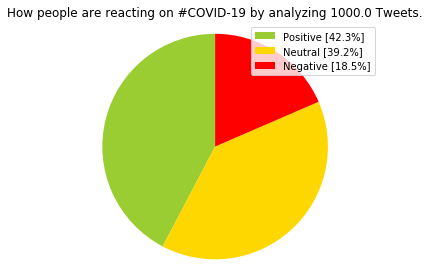

In [2]:
api_key = "zCFloLE29Vd1TMqJxXXaRRriE"
api_secret_key = "BJKox9gxzSnmx0pDvB5DNx835Xx4vL9ssqI4lk68l2O3eKFAtr"
access_token = "345306559-Y1ULoSZxuYffIalfOcePIBx5SgyOAJhBFang80tm"
access_token_secret = "gde5l43aLcWsOYNkm6kNHQtEM3S0Ex7Jtr3Gl5Nnpk8uD"
auth  = tweepy.OAuthHandler(consumer_key = api_key,consumer_secret= api_secret_key)
auth.set_access_token(access_token, access_token_secret)

searchTerm = '#COVID-19'
api = tweepy.API(auth)
#tweets = api.search(searchTerm, until = '2020-04-09', count = 10000, lang = 'en')
tweets = tweepy.Cursor(api.search, q=searchTerm, result_type="recent", lang="en").items(1000)

total_polarity = 0.0
total_tweets = 0.0
positive_sentiments = 0
negative_sentiments = 0
neutral_sentiments = 0

for tweet in tweets:
    print(tweet.text)
    analysis = TextBlob(tweet.text)
    total_polarity += analysis.sentiment.polarity
    total_tweets += 1
    if(analysis.sentiment.polarity > 0):
        positive_sentiments += 1
        
    elif(analysis.sentiment.polarity < 0):
        negative_sentiments += 1
    else:
        neutral_sentiments += 1
   
    
print("total_polarity", total_polarity)
print("total_tweets", total_tweets)

labels = ['Positive [' + str(positive_sentiments*100/total_tweets) + '%]', 'Neutral [' + str(neutral_sentiments*100/total_tweets) + '%]','Negative [' + str(negative_sentiments*100/total_tweets) + '%]']
sizes = [positive_sentiments*100/total_tweets, neutral_sentiments*100/total_tweets, negative_sentiments*100/total_tweets]
colors = ['yellowgreen','gold', 'red']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc="best")
plt.title('How people are reacting on ' + searchTerm + ' by analyzing ' + str(total_tweets) + ' Tweets.')
plt.axis('equal')
plt.tight_layout()
plt.show()
    
    